In [119]:
import pandas as pd
df = pd.read_csv('E:/zara.csv')

In [33]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

import os
for dirname, _, filenames in os.walk('E:/zara.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [31]:
sales = pd.read_csv("E:/zara.csv", sep=';')
sales.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [ ]:
# Data Cleaning

In [37]:
# Check the number of rows and columns in the DataFrame
sales.shape

(252, 16)

In [39]:
# Check the columns 
sales.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')

In [41]:
# Check NULL values and data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [43]:
# Drop Missing Values and Duplicates 
sales.dropna(inplace=True)
sales.drop_duplicates(inplace=True)
sales.shape

(250, 16)

In [45]:
# Change the Product ID data type to Categorical Data 
sales["Product ID"]=sales["Product ID"].astype(str)
sales["Product ID"].dtype

dtype('O')

In [47]:
# Check the Unique Currencies
sales["currency"].unique()

array(['USD'], dtype=object)

In [49]:
# Check the Unique Categories
sales["Product Category"].unique()

array(['Clothing'], dtype=object)

In [51]:
# Check the Unique Terms
sales["terms"].unique()

array(['jackets', 'shoes', 'sweaters', 'jeans', 't-shirts'], dtype=object)

In [53]:
# Drop unnecessary columns and change index 
sales.drop(columns=["brand","currency","Product Category","sku","scraped_at"], inplace=True)
sales.set_index('Product ID', inplace=True)
sales.head(3)

,Product Position,Promotion,Seasonal,Sales Volume,url,name,description,price,terms,section
Product ID,,,,,,,,,,
185102,Aisle,No,No,2823,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,jackets,MAN
188771,Aisle,No,No,654,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,jackets,MAN
180176,End-cap,Yes,Yes,2220,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,jackets,MAN


In [55]:
# Check the URLs
sales["url"][2:5].values

array(['https://www.zara.com/us/en/slim-fit-suit-jacket-p01564520.html',
       'https://www.zara.com/us/en/stretch-suit-jacket-p01564300.html',
       'https://www.zara.com/us/en/double-faced-jacket-p08281477.html'],
      dtype=object)

In [57]:
# Data Aggregation

In [59]:
# View Descriptive Statistics
sales.describe()

,Sales Volume,price
count,250.000000,250.000000
mean,1822.224000,85.230560
std,700.136055,50.440938
min,529.000000,7.990000
25%,1239.000000,49.900000
50%,1836.500000,74.945000
75%,2402.250000,109.000000
max,2989.000000,439.000000


In [61]:
# Count Number of Products by Name 
products = sales["name"].value_counts()
products

name
PLAID OVERSHIRT                6
PATCH BOMBER JACKET            4
POCKET OVERSHIRT               4
FAUX LEATHER JACKET            3
LIGHTWEIGHT BOMBER JACKET      3
                              ..
100% LINEN OVERSHIRT           1
POCKET DENIM OVERSHIRT         1
FAUX SUEDE OVERSHIRT           1
TEXTURED POCKET OVERSHIRT      1
ABSTRACT PRINT KNIT T-SHIRT    1
Name: count, Length: 193, dtype: int64

In [63]:
# Count Seasonal products 
products_seasonality = sales["Seasonal"].value_counts()
products_seasonality

Seasonal
Yes    127
No     123
Name: count, dtype: int64

In [65]:
# Calculate average price, total price, and total sales volume by Seaonality and Terms 
seasonality_stats = sales.groupby(["Seasonal", "terms"]).agg(
    avg_price=('price', 'mean'),
    total_price=('price','sum'),
    total_sales=('Sales Volume','sum')
)

# Rounding the results to 2 decimal places
seasonality_stats[['avg_price', 'total_price']] = seasonality_stats[['avg_price', 'total_price']].round(2)
seasonality_stats

avg_price  total_price  total_sales
Seasonal terms                                        
No       jackets      106.74      7151.46       122309
         jeans         56.52       282.59         9672
         shoes         65.50      1310.09        39803
         sweaters      53.40       640.80        20270
         t-shirts      63.29      1202.50        32500
Yes      jackets      101.78      7226.65       133142
         jeans         76.27       228.80         3648
         shoes         63.73       700.99        18103
         sweaters      55.47      1608.57        54972
         t-shirts      73.48       955.19        21137

In [67]:
# Count Number of Products by Terms 
product_terms = sales["terms"].value_counts()
product_terms

terms
jackets     138
sweaters     41
t-shirts     32
shoes        31
jeans         8
Name: count, dtype: int64

In [69]:
# Calculate average price, total price, and total sales volume by Section and Terms 
terms_stats = sales.groupby(["terms","section"]).agg(
    avg_price=('price', 'mean'),
    total_price=('price','sum'),
    total_sales=('Sales Volume','sum')
)

# Rounding the results to 2 decimal places
terms_stats[['avg_price', 'total_price']] = terms_stats[['avg_price', 'total_price']].round(2)
terms_stats

avg_price  total_price  total_sales
terms    section                                     
jackets  MAN         104.19     14378.11       255451
jeans    MAN          63.92       511.39        13320
shoes    MAN          64.87      2011.08        57906
sweaters MAN          75.93       531.49        11868
         WOMAN        50.53      1717.88        63374
t-shirts MAN          67.43      2157.69        53637

In [71]:
# Count Promoted products
product_promotion = sales["Promotion"].value_counts()
product_promotion

Promotion
No     132
Yes    118
Name: count, dtype: int64

In [73]:
# Calculate average price, total price, and total sales volume by Promotion and Terms 
promotion_stats = sales.groupby(["Promotion", "terms"]).agg(
    avg_price=('price', 'mean'),
    total_price=('price','sum'),
    total_sales=('Sales Volume','sum')
)

# Rounding the results to 2 decimal places
promotion_stats[['avg_price', 'total_price']] = promotion_stats[['avg_price', 'total_price']].round(2)
promotion_stats


avg_price  total_price  total_sales
Promotion terms                                        
No        jackets       96.28      6931.95       134416
          jeans         63.90       319.50         8611
          shoes         57.38       860.68        28560
          sweaters      59.01      1357.17        38461
          t-shirts      69.22      1176.70        30264
Yes       jackets      112.82      7446.16       121035
          jeans         63.96       191.89         4709
          shoes         71.90      1150.40        29346
          sweaters      49.57       892.20        36781
          t-shirts      65.40       980.99        23373

In [75]:
# Count Number of Products by Position
product_position = sales["Product Position"].value_counts()
product_position

Product Position
Aisle             97
End-cap           84
Front of Store    69
Name: count, dtype: int64

In [77]:
# Calculate average price, total price, and total sales volume by Position and Terms 
position_stats = sales.groupby(["Product Position"]).agg(
    avg_price=('price', 'mean'),
    total_price=('price','sum'),
    total_sales=('Sales Volume','sum')
)

# Rounding the results to 2 decimal places
position_stats[['avg_price', 'total_price']] = position_stats[['avg_price', 'total_price']].round(2)
position_stats

,avg_price,total_price,total_sales
Product Position,,,
Aisle,88.79,8612.22,177396
End-cap,78.12,6561.77,148913
Front of Store,88.89,6133.65,129247


C:\Users\Demon\AppData\Local\Temp\ipykernel_6744\3067067165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Promotion', y='Sales Volume', data=sales, palette='pastel')


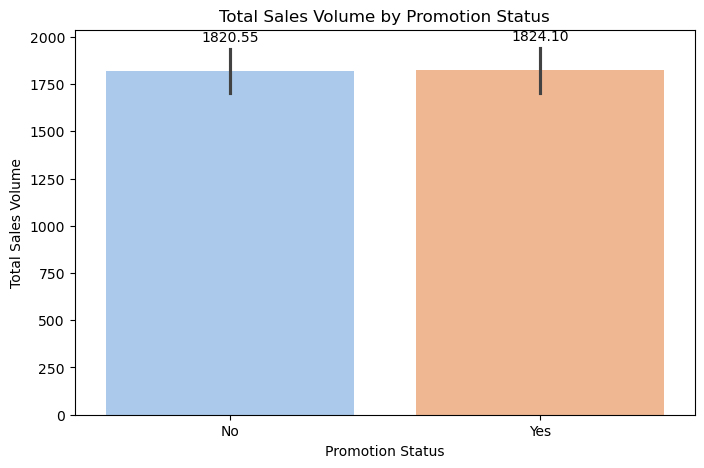

In [79]:
# Bar chart for Sales Volume by Promotion
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Promotion', y='Sales Volume', data=sales, palette='pastel')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=19, label_type='edge')
    
# Customize the plot
plt.title('Total Sales Volume by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Total Sales Volume')
plt.show()

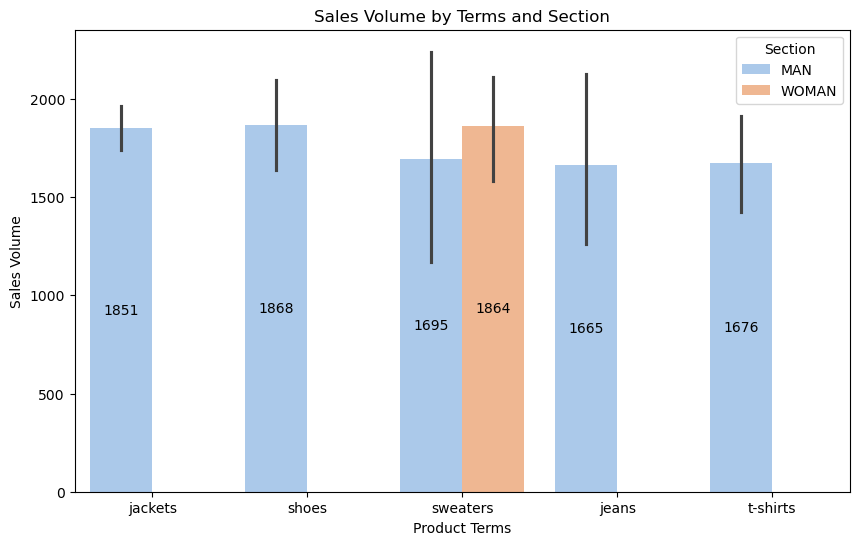

In [81]:
# Create a grouped bar plot for Sales Volume by terms and section
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='terms', y='Sales Volume', hue='section', data=sales, palette='pastel')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center')
    
# Customize the plot
plt.title('Sales Volume by Terms and Section')
plt.xlabel('Product Terms')
plt.ylabel('Sales Volume')
plt.legend(title='Section')
plt.show()

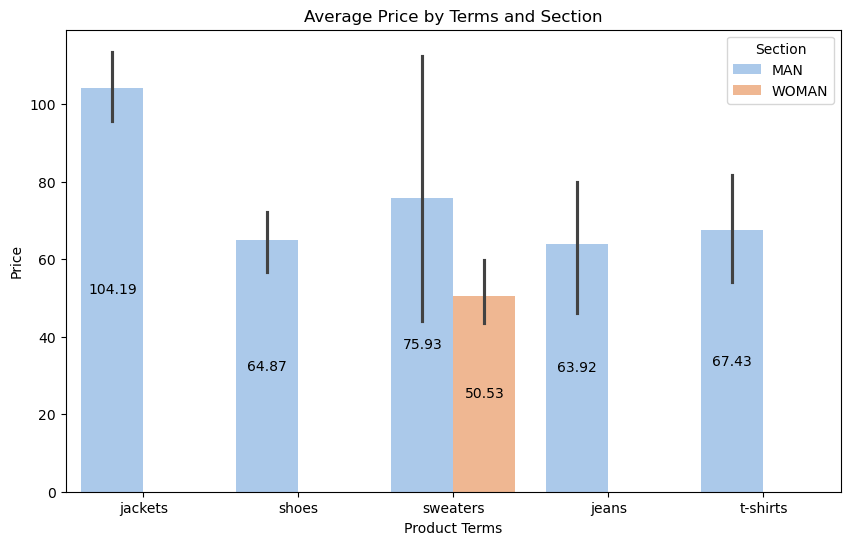

In [83]:
# Create a grouped bar plot for Sales Volume by terms and section
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='terms', y='price', hue='section', data=sales, palette='pastel')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')
    
# Customize the plot
plt.title('Average Price by Terms and Section')
plt.xlabel('Product Terms')
plt.ylabel('Price')
plt.legend(title='Section')
plt.show()

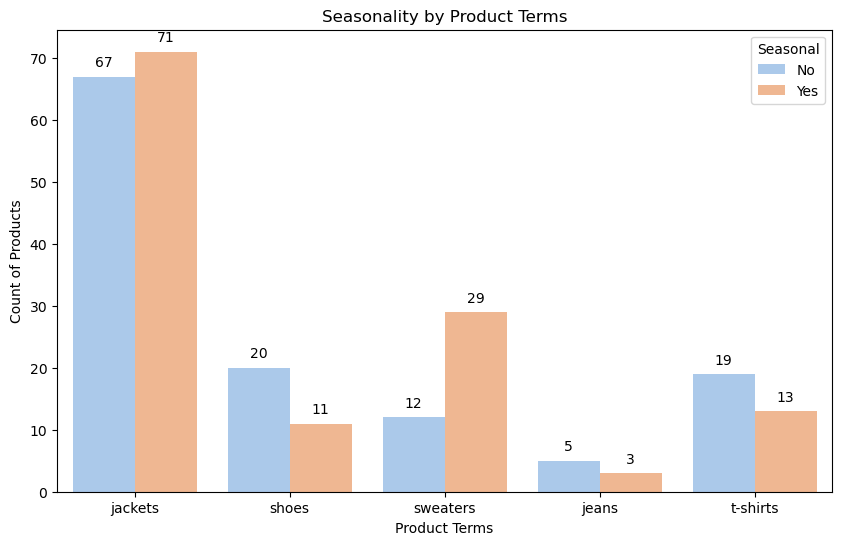

In [85]:
# Create a grouped bar plot for Seasonality by terms
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='terms', hue='Seasonal', data=sales, palette='pastel')

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5)

# Customize the plot
plt.title('Seasonality by Product Terms')
plt.xlabel('Product Terms')
plt.ylabel('Count of Products')
plt.legend(title='Seasonal')
plt.show()

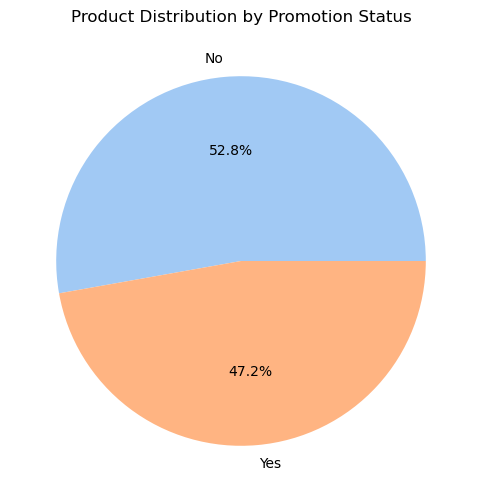

In [89]:
# Pie chart for product distribution by promotion
promotion_counts = sales['Promotion'].value_counts()

# Customize the plot
plt.figure(figsize=(6, 6))
plt.pie(promotion_counts, labels=promotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Product Distribution by Promotion Status')
plt.show()

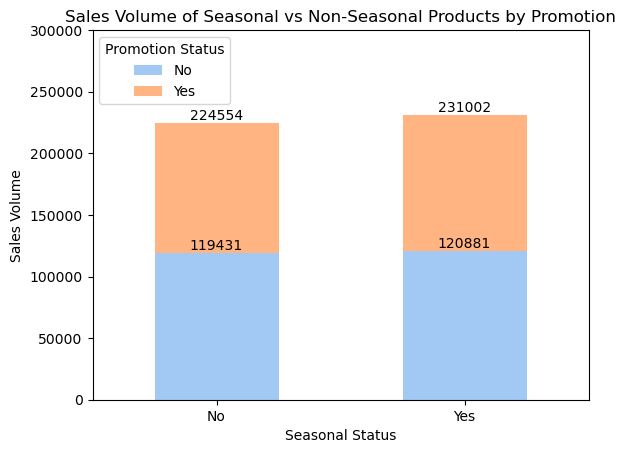

In [91]:
# Stacked bar chart for seasonal products
seasonal_sales = sales.groupby(['Seasonal', 'Promotion'])['Sales Volume'].sum().unstack()
ax = seasonal_sales.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)
    
# Customize the plot
plt.xticks(rotation=0)
plt.ylim(0,300000)
plt.title('Sales Volume of Seasonal vs Non-Seasonal Products by Promotion')
plt.xlabel('Seasonal Status')
plt.ylabel('Sales Volume')
plt.legend(title='Promotion Status')
plt.show()

C:\Users\Demon\AppData\Local\Temp\ipykernel_6744\2063934706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Position', y='Sales Volume', data=sales, palette='pastel')


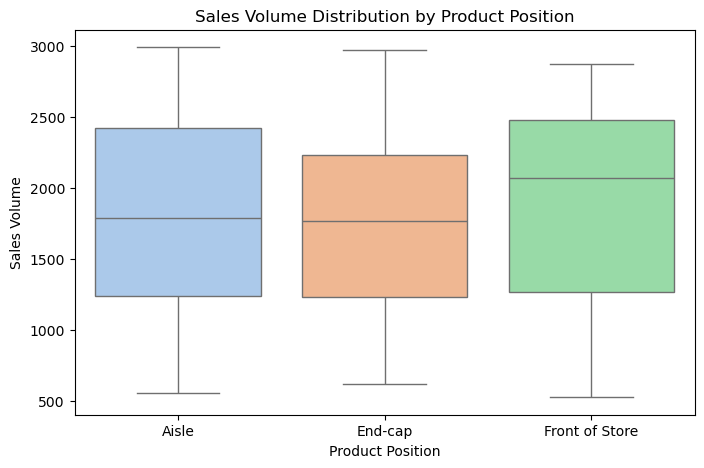

In [93]:
# Box plot for Sales Volume by Product Position
plt.figure(figsize=(8, 5))
sns.boxplot(x='Product Position', y='Sales Volume', data=sales, palette='pastel')

# Customize the plot
plt.title('Sales Volume Distribution by Product Position')
plt.xlabel('Product Position')
plt.ylabel('Sales Volume')
plt.show()

C:\Users\Demon\AppData\Local\Temp\ipykernel_6744\3961195215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Position', y='price', data=sales, palette='pastel')


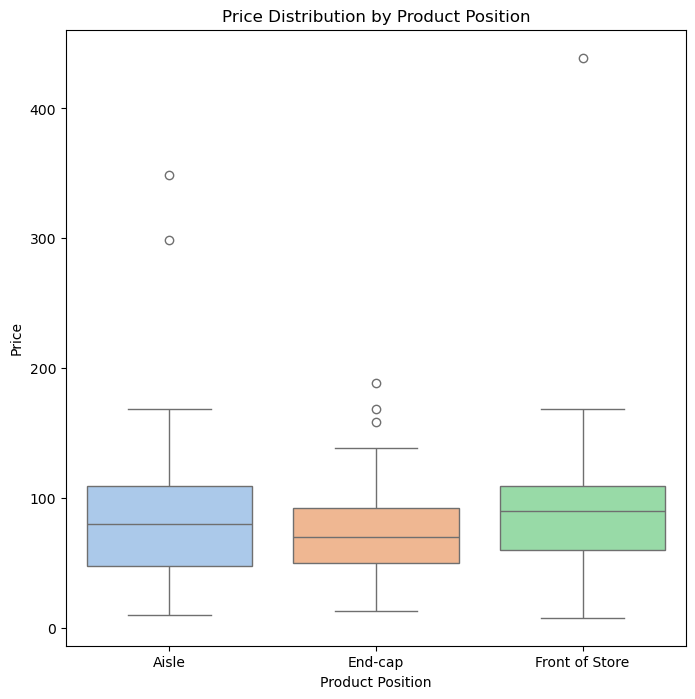

In [95]:
# Box plot for Price by Product Position
plt.figure(figsize=(8, 8))
sns.boxplot(x='Product Position', y='price', data=sales, palette='pastel')

# Customize the plot
plt.title('Price Distribution by Product Position')
plt.xlabel('Product Position')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='Product Position', ylabel='price'>

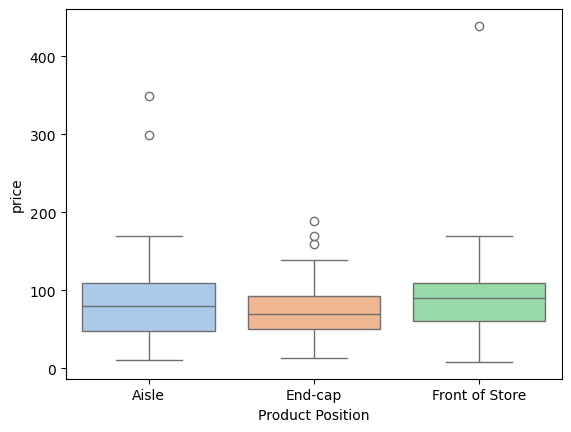

In [99]:
sns.boxplot(x='Product Position', y='price', data=sales, hue='Product Position', palette='pastel', legend=False)


C:\Users\Demon\AppData\Local\Temp\ipykernel_6744\3816226786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sales Volume', y='name', data=top_products, palette='pastel')


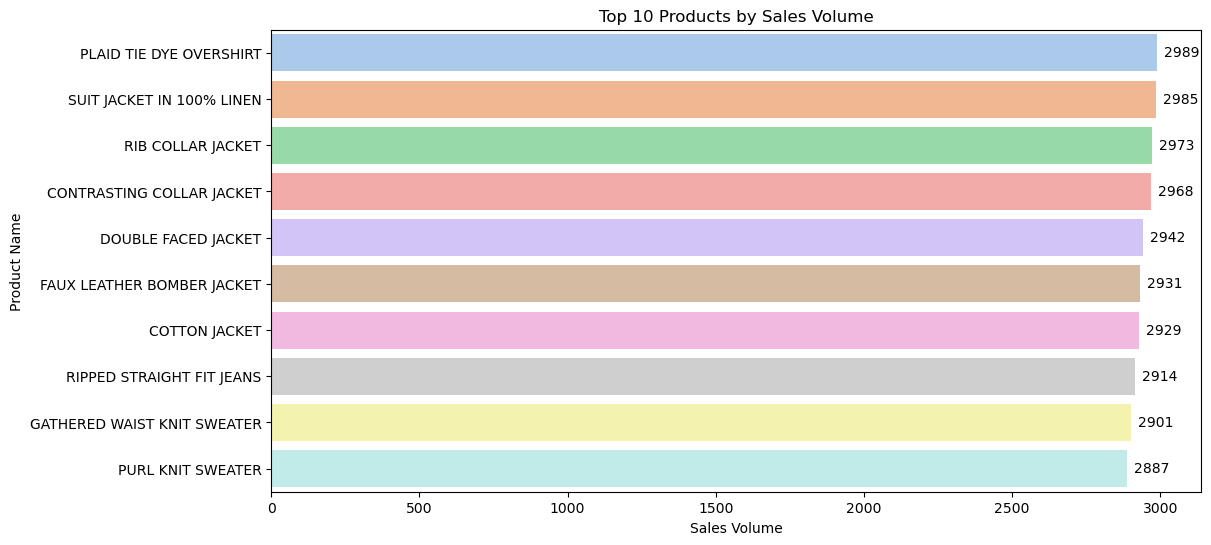

In [101]:
# Get the top 10 products by Sales Volume
top_products = sales.nlargest(10, 'Sales Volume')

# Create a bar plot for the top 10 products by Sales Volume
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Sales Volume', y='name', data=top_products, palette='pastel')

# Add labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5)

# Customize the plot
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Product Name')
plt.show()

C:\Users\Demon\AppData\Local\Temp\ipykernel_6744\1825645034.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='price', y='name', data=most_expensive_products, palette='pastel')


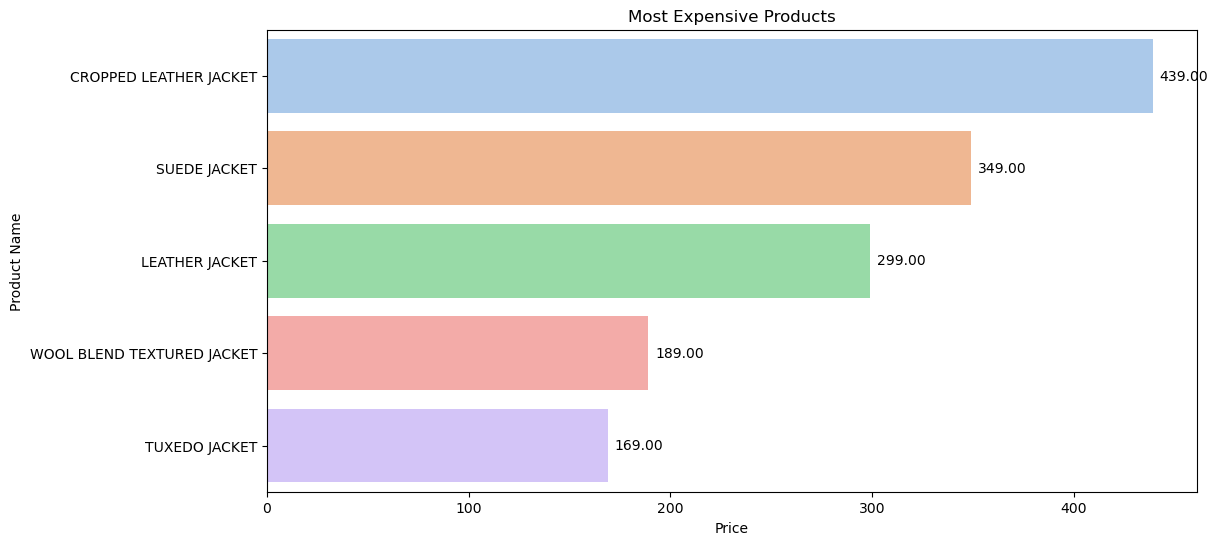

In [103]:
# Get the most expensive product 
most_expensive_products = sales.nlargest(5, 'price')

# Create a bar plot for the most expensive products
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='price', y='name', data=most_expensive_products, palette='pastel')

# Add labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

# Customize the plot
plt.title('Most Expensive Products')
plt.xlabel('Price')
plt.ylabel('Product Name')
plt.show()

C:\Users\Demon\AppData\Local\Temp\ipykernel_6744\391743838.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='price', y='name', data=cheapest_products, palette='pastel')


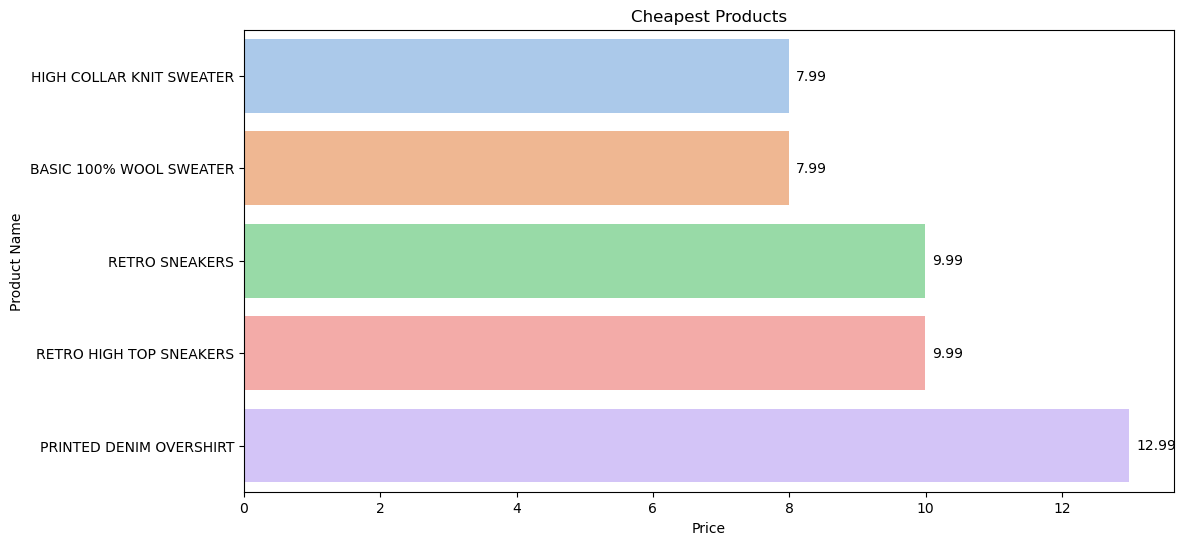

In [105]:
# Get the cheapest products 
cheapest_products = sales.nsmallest(5, 'price')

# Create a bar plot for the cheapest products
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='price', y='name', data=cheapest_products, palette='pastel')

# Add labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

# Customize the plot
plt.title('Cheapest Products')
plt.xlabel('Price')
plt.ylabel('Product Name')
plt.show()

In [107]:
# Correlation 
def interpret_correlation(corr_value):
    if corr_value > 0.8:
        return "Strong positive correlation"
    elif 0.5 < corr_value <= 0.8:
        return "Moderate positive correlation"
    elif 0.3 < corr_value <= 0.5:
        return "Weak positive correlation"
    elif -0.3 <= corr_value <= 0.3:
        return "No or very weak correlation"
    elif -0.5 <= corr_value < -0.3:
        return "Weak negative correlation"
    elif -0.8 <= corr_value < -0.5:
        return "Moderate negative correlation"
    else:
        return "Strong negative correlation"

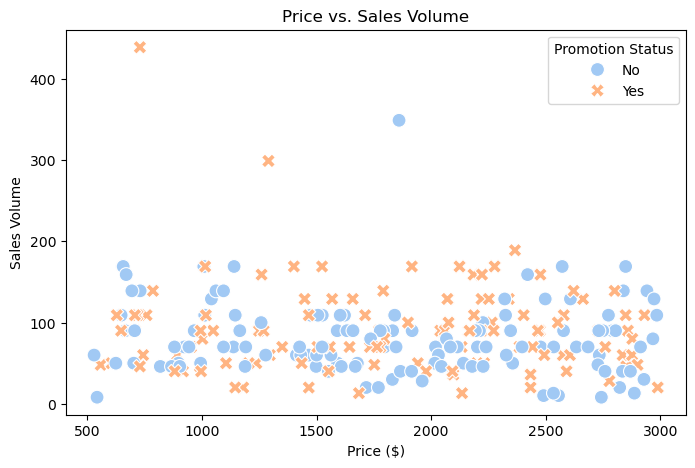

In [109]:
# Scatter plot for Price vs. Sales Volume
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sales Volume', y='price', data=sales, hue='Promotion', style='Promotion', palette='pastel', s=100)

# Customize the plot
plt.title('Price vs. Sales Volume')
plt.xlabel('Price ($)')
plt.ylabel('Sales Volume')
plt.legend(title='Promotion Status')
plt.show()

In [111]:
# Correlation between Price and Sales Volume
corr_sales_price=sales["price"].corr(sales["Sales Volume"])
corr = interpret_correlation(corr_sales_price)
print(f"Correlation result: {corr} which is = {corr_sales_price.round(5)}")

Correlation result: No or very weak correlation which is = -0.08272


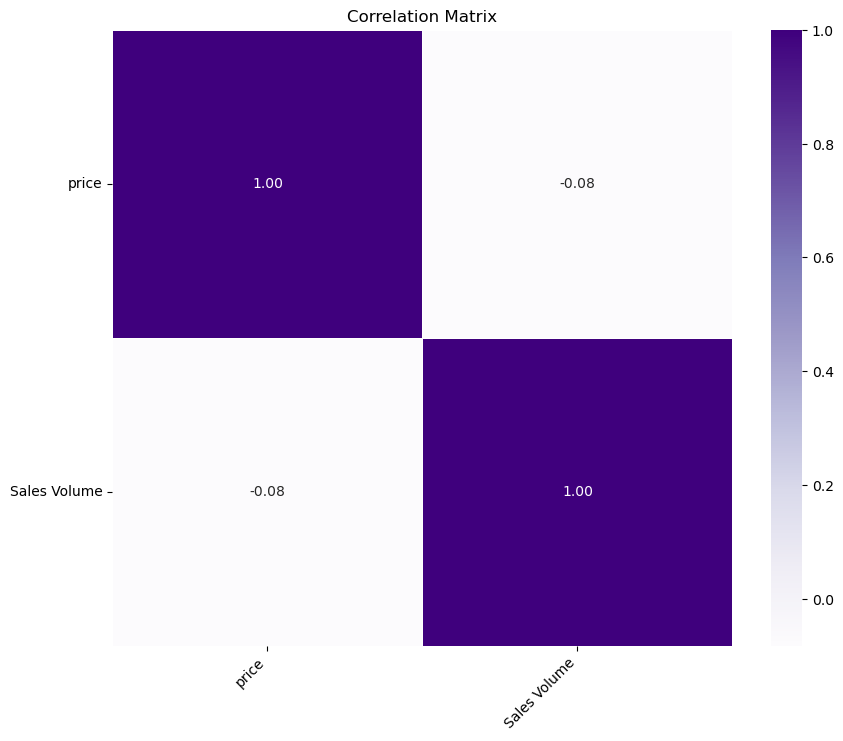

In [113]:
# Calculate Correlation 
corr_matrix = sales[["price","Sales Volume"]].corr()  

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Purples', linewidths=0.5, cbar=True)

# Customize the plot
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.show()

In [129]:
df.to_csv('E:/zaaara.csv', index=False)